In [105]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import seaborn as sns

# Cấu hình đường dẫn dataset
dataset_path = "/media/icnlab/Data/Manh/tinyML/FieldPlant-11/train"

# # Bước 1: Đọc thông tin các lớp và ảnh Plantdoc
# class_names = sorted(os.listdir(dataset_path))
# class_names = [cls for cls in class_names if os.path.isdir(os.path.join(dataset_path, cls))]

# # read tomato class
# tomato_classes = [cls for cls in tomato_classes if os.path.isdir(os.path.join(dataset_path, cls)) & ('tomato' in cls.lower())]

# for cls in tomato_classes:
#     class_folder = os.path.join(dataset_path, cls)
#     for fname in os.listdir(class_folder):
#         if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#             image_paths.append(os.path.join(class_folder, fname))
#             labels.append(cls)

# Đọc thông tin FieldPlant

file = '/media/icnlab/Data/Manh/tinyML/FieldPlant-11/train/_annotations.coco.json'
from pycocotools.coco import COCO
coco = COCO(file)
cats = coco.loadCats(coco.getCatIds())

def get_category_info(id):
    # Get all categories
    cats = coco.loadCats(coco.getCatIds())
    
    for cat in cats:
        if cat['id'] == id:
            return {
                'id': cat['id'],
                'name': cat['name'],
                'supercategory': cat['supercategory'],
            }
    return None

len(os.listdir(dataset_path))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


5157

📦 Tổng số ảnh: 2031
🔖 Số lớp: 28
📚 Danh sách lớp: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']


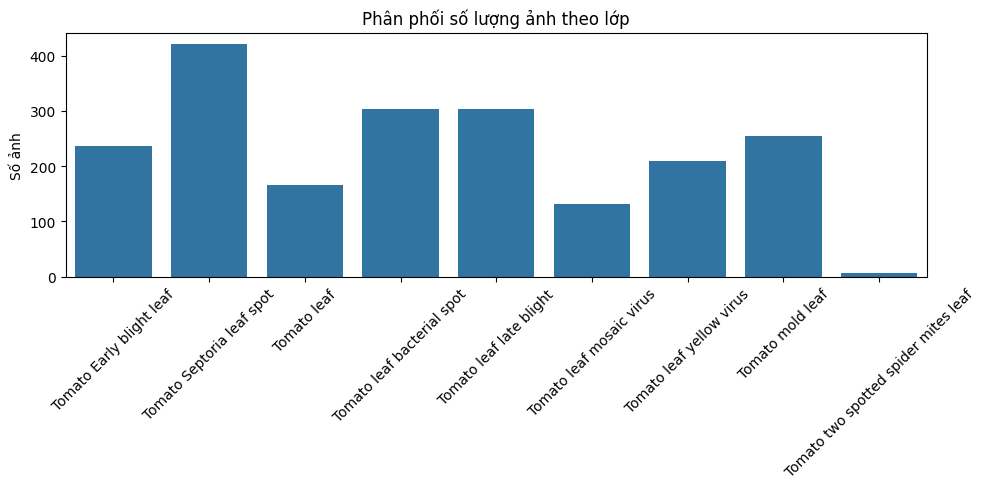

In [ ]:
# Bước 2: Thống kê tổng quan
print(f"📦 Tổng số ảnh: {len(image_paths)}")
print(f"🔖 Số lớp: {len(class_names)}")
print(f"📚 Danh sách lớp: {class_names}")

# Bước 3: Vẽ biểu đồ phân phối số ảnh theo lớp
label_counts = Counter(labels)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Phân phối số lượng ảnh theo lớp")
plt.xticks(rotation=45)
plt.ylabel("Số ảnh")
plt.tight_layout()
plt.show()

# Bước 4: Hiển thị ảnh ví dụ
def show_sample_images(image_paths, labels, class_names, samples_per_class=3):
    plt.figure(figsize=(samples_per_class * 3, len(class_names) * 3))
    for class_idx, class_name in enumerate(class_names):
        class_images = [p for p, l in zip(image_paths, labels) if l == class_name][:samples_per_class]
        for i, img_path in enumerate(class_images):
            plt_idx = class_idx * samples_per_class + i + 1
            img = Image.open(img_path)
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.ylabel(class_name, rotation=0, labelpad=60, fontsize=12)
    plt.suptitle("Một vài ảnh ví dụ từ mỗi lớp", fontsize=16)
    plt.tight_layout()
    plt.show()

# show_sample_images(image_paths, labels, class_names)

Phân tích ảnh: 100%|██████████| 2031/2031 [00:49<00:00, 41.31it/s]


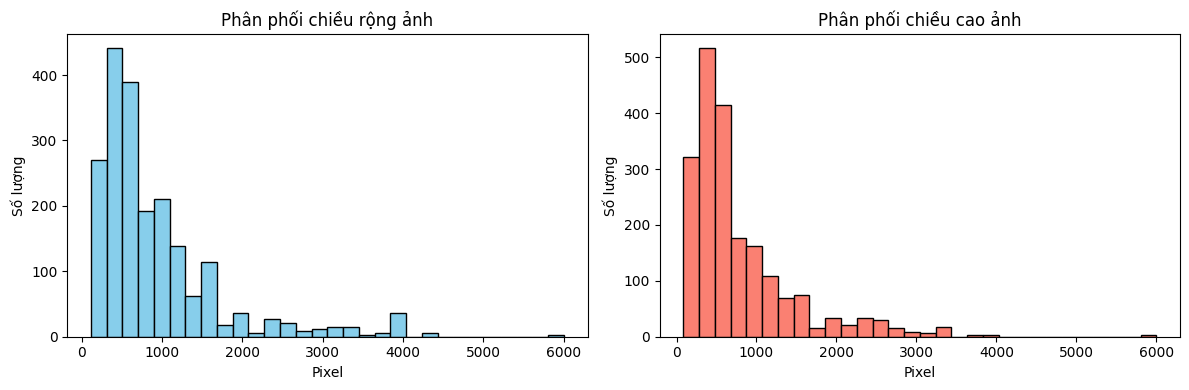

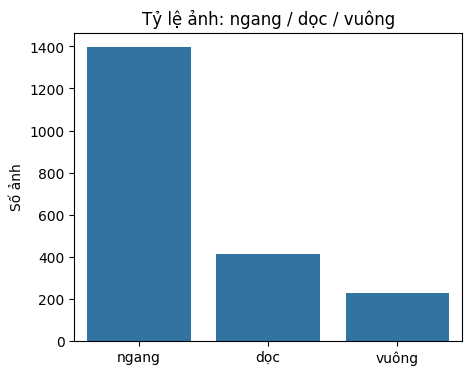

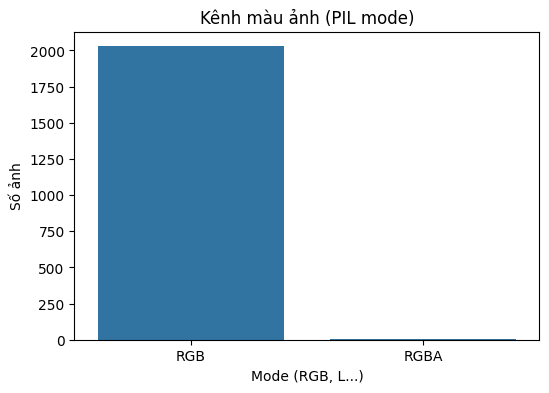

In [96]:
# Analyst image size
from tqdm import tqdm
import numpy as np

# Bước 5: Phân tích kích thước ảnh và tỷ lệ
widths, heights, modes = [], [], []
bad_files = 0

for path in tqdm(image_paths, desc="Phân tích ảnh"):
    try:
        with Image.open(path) as img:
            widths.append(img.width)
            heights.append(img.height)
            modes.append(img.mode)
    except Exception as e:
        bad_files += 1
        continue

# Kích thước ảnh phổ biến
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title("Phân phối chiều rộng ảnh")
plt.xlabel("Pixel")
plt.ylabel("Số lượng")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.title("Phân phối chiều cao ảnh")
plt.xlabel("Pixel")
plt.ylabel("Số lượng")

plt.tight_layout()
plt.show()

# Tỷ lệ ảnh: ngang, dọc, vuông
ratios = np.array(widths) / np.array(heights)
ratio_categories = ["ngang" if r > 1.1 else "dọc" if r < 0.9 else "vuông" for r in ratios]
ratio_counts = Counter(ratio_categories)

plt.figure(figsize=(5, 4))
sns.barplot(x=list(ratio_counts.keys()), y=list(ratio_counts.values()))
plt.title("Tỷ lệ ảnh: ngang / dọc / vuông")
plt.ylabel("Số ảnh")
plt.show()

# Bước 6: Phân tích kênh màu (mode: RGB, L, v.v.)
mode_counts = Counter(modes)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()))
plt.title("Kênh màu ảnh (PIL mode)")
plt.xlabel("Mode (RGB, L...)")
plt.ylabel("Số ảnh")
plt.show()

# Báo cáo số ảnh lỗi
if bad_files > 0:
    print(f"⚠️ Có {bad_files} ảnh không thể mở được (có thể bị hỏng).")

In [ ]:
# Analyst histogram 1 image
def plot_color_histogram(image_path):
    img = Image.open(image_path).convert("RGB")
    channels = img.split()
    colors = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 3))
    for channel, color in zip(channels, colors):
        hist = channel.histogram()
        plt.plot(hist, color=color)
    plt.title("Histogram màu ảnh")
    plt.xlabel("Giá trị pixel")
    plt.ylabel("Tần suất")
    plt.show()

plot_color_histogram(image_paths[0])

Tính độ sáng / tương phản: 100%|██████████| 500/500 [02:38<00:00,  3.15it/s]


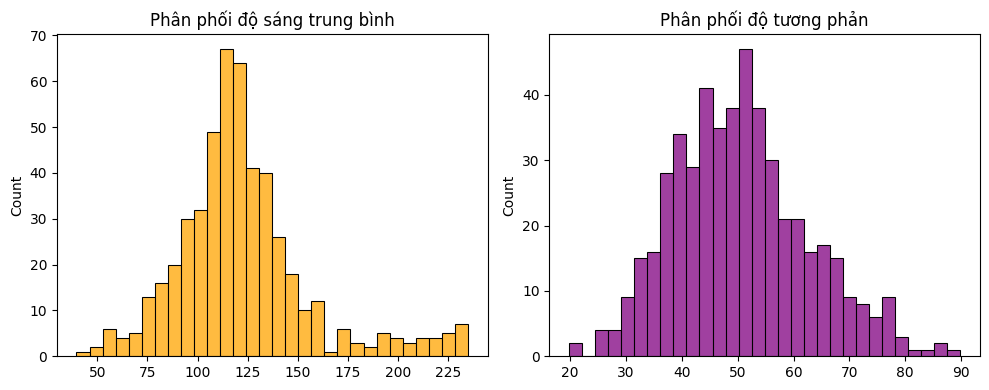

In [97]:
# Analyst 
def compute_brightness_contrast(img):
    grayscale = img.convert("L")
    arr = np.array(grayscale)
    brightness = arr.mean()
    contrast = arr.std()
    return brightness, contrast

brightness_list, contrast_list = [], []
for path in tqdm(image_paths[:500], desc="Tính độ sáng / tương phản"):  # giới hạn 500 ảnh cho nhanh
    try:
        img = Image.open(path)
        b, c = compute_brightness_contrast(img)
        brightness_list.append(b)
        contrast_list.append(c)
    except:
        continue

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(brightness_list, bins=30, color="orange")
plt.title("Phân phối độ sáng trung bình")

plt.subplot(1, 2, 2)
sns.histplot(contrast_list, bins=30, color="purple")
plt.title("Phân phối độ tương phản")
plt.tight_layout()
plt.show()


In [ ]:
import imagehash

hashes_phash = {}
duplicates_phash = []

for path in tqdm(image_paths, desc="pHash ảnh"):
    try:
        img = Image.open(path)
        h = imagehash.phash(img)
        if h in hashes_phash:
            duplicates_phash.append((hashes_phash[h], path))
        else:
            hashes_phash[h] = path
    except:
        continue

print(f"🔍 Số ảnh trùng theo pHash: {len(duplicates_phash)}")

pHash ảnh: 100%|██████████| 2031/2031 [00:58<00:00, 34.47it/s] 

🔍 Số ảnh trùng theo pHash: 1370


📊 Tỉ lệ mất cân bằng: lớn nhất / nhỏ nhất = 420 / 6 = 70.00


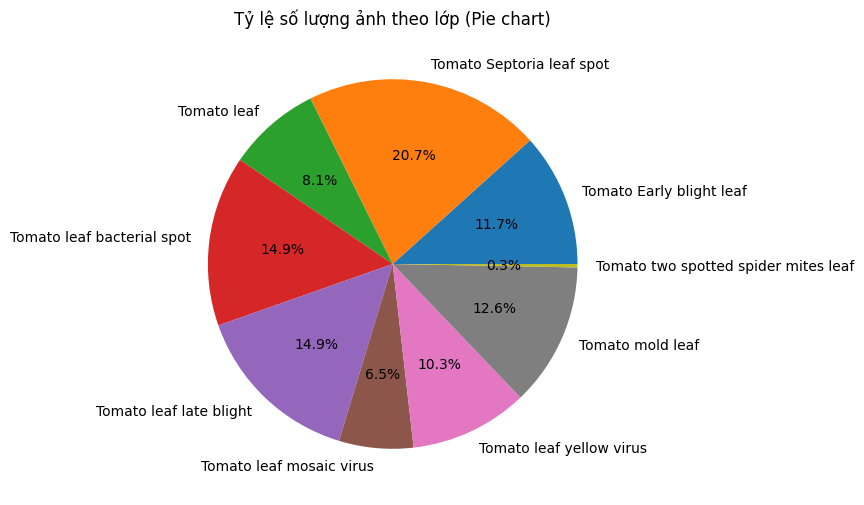

In [99]:
# check class imbalance
max_class = max(label_counts.values())
min_class = min(label_counts.values())
print(f"📊 Tỉ lệ mất cân bằng: lớn nhất / nhỏ nhất = {max_class} / {min_class} = {max_class / min_class:.2f}")

plt.figure(figsize=(6, 6))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%')
plt.title("Tỷ lệ số lượng ảnh theo lớp (Pie chart)")
plt.show()